<a href="https://colab.research.google.com/github/okwasna/zadanie1/blob/main/zadanie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install biopython matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.6 MB/s eta 0:00:00


In [7]:
from Bio.PDB import PDBParser
import numpy as np
import matplotlib.pyplot as plt


In [12]:
import urllib.request

pdb_id = "1HHB"
url = f"https://www.rcsb.org/pdb/files/{pdb_id}.pdb"
filename = f"{pdb_id}.pdb"

urllib.request.urlretrieve(url, filename)


('1HHB.pdb', <http.client.HTTPMessage at 0x7e6aac9e99c0>)

In [13]:
parser = PDBParser()
structure = parser.get_structure("1HHB", "1HHB.pdb")


/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2569.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2612.
  warnings.warn(


In [17]:
ca_atoms = [atom for atom in structure.get_atoms() if atom.get_name() == "CA"]


In [15]:
n_atoms = len(ca_atoms)
contact_map = np.zeros((n_atoms, n_atoms))

for i, atom_i in enumerate(ca_atoms):
    for j, atom_j in enumerate(ca_atoms):
        distance = atom_i - atom_j
        contact_map[i, j] = 1 if distance < 8.0 else 0


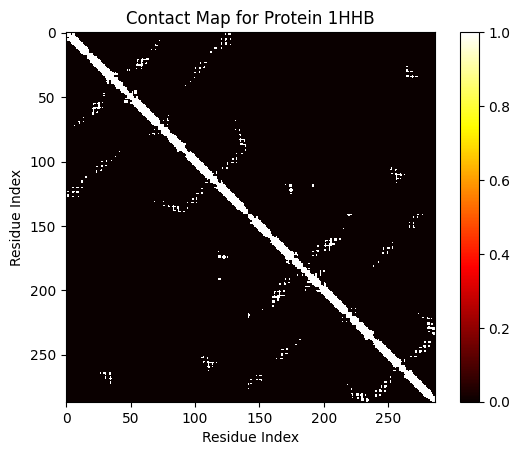

In [16]:
plt.imshow(contact_map, cmap='hot', interpolation='nearest')
plt.title("Contact Map for Protein 1HHB")
plt.xlabel("Residue Index")
plt.ylabel("Residue Index")
plt.colorbar()
plt.show()
